In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# For optimization using pygmo
import pygmo as pg
import numpy as np
from udp_initial_condition import udp_initial_condition

# For Plotting
import matplotlib.pyplot as plt

# For cProfile evaluation
import cProfile
import pstats

In [1]:
# Setup hyperparameters:
body_density = 533                  # https://sci.esa.int/web/rosetta/-/14615-comet-67p
target_altitude = 5000**2           # Target altitude squared
final_time = 20*3600.0              # Final time
start_time = 0                      # Starting time
time_step = 600              # Time step size for trajectory propagation.

# Bounds for initial variable domain: [r_x,r_y,r_z,v_x,v_y,v_z]
lower_bounds, upper_bounds = np.array([-6000,-6000,-6000,0,0,0]),np.array([6000,6000,6000,2.5,2.5,2.5])

# Optimization parameters
population_size = 10 #10
number_of_generations = 32 #32

NameError: name 'np' is not defined

In [5]:
# Main script:

def run():

    # Setup hyperparameters:
    body_density = 533                  # https://sci.esa.int/web/rosetta/-/14615-comet-67p
    target_altitude = 5000**2           # Target altitude squared
    final_time = 20*3600.0              # Final time
    start_time = 0                      # Starting time
    time_step = 800              # Time step size for trajectory propagation.

    # Bounds for initial variable domain: [r_x,r_y,r_z,v_x,v_y,v_z]
    lower_bounds, upper_bounds = np.array([-6000,-6000,-6000,0,0,0]),np.array([6000,6000,6000,2.5,2.5,2.5])

    # Optimization parameters
    population_size = 10
    number_of_generations = 32

    # Choose algorithm: 
    #  - "RKF78", "Euler" or "DP8713M"
    algorithm = "RKF78"

    # Setup problem class
    udp = udp_initial_condition(body_density, target_altitude, final_time, start_time, time_step, lower_bounds, upper_bounds, algorithm)

    # Setup user defined problem (udp)
    prob = pg.problem(udp)

    # Setup optimization algorithm
    algo = pg.algorithm(pg.sade(gen = number_of_generations))
    pop = pg.population(prob = prob, size = population_size)
    
    # Run optimization
    algo.set_verbosity(1)
    pop = algo.evolve(pop)

    # Logs for output
    print("Champion fitness value: ", pop.champion_f) 
    print("Champion chromosome: ", pop.champion_x) 

    # Retrieving champion chromosome
    x = pop.champion_x

    # Compute optimized trajectory
    fitness_value, trajectory_info  = udp.compute_trajectory(x)

    # Plot optimized trajectory
    udp.plot_trajectory(trajectory_info[0:3,:])

    plt.plot(trajectory_info[0,:],trajectory_info[1,:])

    return trajectory_info


def main():
    trajectory_info = run()


if __name__ == "__main__":
    cProfile.run("main()", "output.dat")

    with open("output_time.txt", "w") as f:
        p = pstats.Stats("output.dat", stream=f)
        p.sort_stats("time").print_stats()
    
    with open("output_calls.txt", "w") as f:
        p = pstats.Stats("output.dat", stream=f)
        p.sort_stats("calls").print_stats()


Physical dimension along x (UN-normalized):  5002.5703125 Km

   Gen:        Fevals:          Best:             F:            CR:            dx:            df:
      1             10    2.68538e+07        0.19635       0.211993        10202.6    1.20524e+10
      2             20    2.68538e+07        0.19635       0.211993        7144.54    1.14885e+10
      3             30    2.68538e+07        0.19635       0.211993        20314.1    1.09225e+10
      4             40    2.24456e+07       0.489608       0.407986        4975.88    9.48585e+09
      5             50    1.11203e+07       0.489608       0.407986        6106.45    9.46942e+09
      6             60    1.11203e+07       0.489608       0.407986        6106.45    9.46942e+09
      7             70    9.94289e+06        0.19635       0.211993         3389.8     5.5291e+09
      8             80    9.94289e+06        0.19635       0.211993        12354.1    4.17547e+09


KeyboardInterrupt: 

In [13]:
# For optimization using pygmo
import pygmo as pg
import numpy as np
from udp_initial_condition import udp_initial_condition

# For Plotting
import matplotlib.pyplot as plt

In [72]:
# Setup hyperparameters:
body_density = 533                  # https://sci.esa.int/web/rosetta/-/14615-comet-67p
target_altitude = 5000**2           # Target altitude squared
final_time = 20*3600.0              # Final time
start_time = 0                      # Starting time
time_step = 800              # Time step size for trajectory propagation.

# Bounds for initial variable domain: [r_x,r_y,r_z,v_x,v_y,v_z]
lower_bounds, upper_bounds = np.array([-6000,-6000,-6000,0,0,0]),np.array([6000,6000,6000,2.5,2.5,2.5])

# Optimization parameters
population_size = 10
number_of_generations = 32

# Choose algorithm: 
#  - "RKF78", "Euler" or "DP8713M"
algorithm = "RKF78"

# Setup problem class
udp = udp_initial_condition(body_density, target_altitude, final_time, start_time, time_step, lower_bounds, upper_bounds, algorithm)


Physical dimension along x (UN-normalized):  5002.5703125 Km


In [15]:
# Compute optimized trajectory
x = [-1.06437413e+03, 4.33471220e+03, -3.29768568e+03, 2.67521306e-01, 3.42036498e-01, 3.66164107e-01]
fitness_value, trajectory_info  = udp.compute_trajectory(x)

In [16]:
print("fitness: ", fitness_value)
print("traj shape: ", trajectory_info.shape)
print("traj: ", trajectory_info[3:6,:])

fitness:  5222502.066078605
traj shape:  (6, 81)
traj:  [[ 2.67521306e-01  2.75032539e-01  2.81267327e-01  2.84221218e-01
   2.84344820e-01  2.81785198e-01  2.76591108e-01  2.68886909e-01
   2.58159298e-01  2.45101355e-01  2.29616690e-01  2.12260599e-01
   1.94006873e-01  1.74077778e-01  1.54527749e-01  1.34098423e-01
   1.14049527e-01  9.30001291e-02  7.21881212e-02  5.11945293e-02
   2.99072740e-02  8.66381567e-03 -1.32804322e-02 -3.54779666e-02
  -5.76596013e-02 -8.10985802e-02 -1.04625049e-01 -1.28377344e-01
  -1.49860247e-01 -1.68363608e-01 -1.85301936e-01 -2.00842527e-01
  -2.14108785e-01 -2.25518090e-01 -2.35144381e-01 -2.42795137e-01
  -2.48776272e-01 -2.53175355e-01 -2.55498264e-01 -2.55824952e-01
  -2.53974333e-01 -2.49391449e-01 -2.41471097e-01 -2.31790995e-01
  -2.20901669e-01 -2.08544227e-01 -1.95273480e-01 -1.80279754e-01
  -1.64490089e-01 -1.47122464e-01 -1.27732926e-01 -1.07385127e-01
  -8.57690273e-02 -6.29307729e-02 -3.88314401e-02 -1.36604355e-02
   1.16616174e-02  3

BokehModel(combine_events=True, render_bundle={'docs_json': {'59232a59-3707-45fe-aa9a-496ffae798ff': {'defs': …

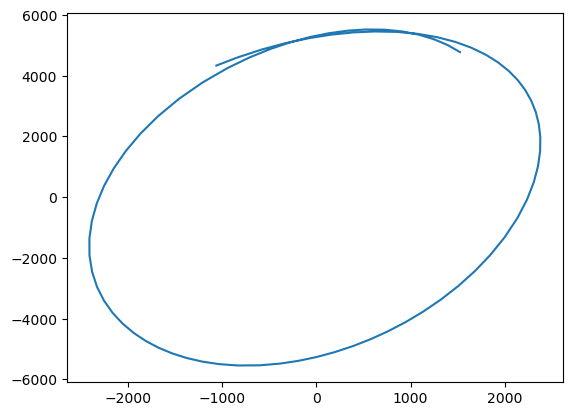

In [73]:
# Plot optimized trajectory

# Pyvista requires even number of point, if trajectory holds
#   an uneven amount, only plot until second last point.
if (len(trajectory_info[0]) % 2) != 0:
    trajectory_info = trajectory_info[0:3,0:-1]
else:
    trajectory_info = trajectory_info[0:3,:]

udp.plot_trajectory(trajectory_info)

plt.plot(trajectory_info[0,:],trajectory_info[1,:])